# Differential Gene Expression (DGE) Analysis

## 1. [Setup and overview of gene-level differential expression analysis](https://hbctraining.github.io/DGE_workshop_salmon/lessons/01_DGE_setup_and_overview.html)

In [16]:
# install.packages(c("BiocManager", "pheatmap"))
# BiocManager::install("DESeq2")
# BiocManager::install("DEGreport")
# BiocManager::install("tximport")

In [17]:
library(DESeq2)
library(tidyverse)
library(RColorBrewer)
library(pheatmap)
library(DEGreport)
library(tximport)
library(ggplot2)
library(ggrepel)

### 1.1 Setup

#### Load data

In [18]:
HOME = Sys.getenv("HOME")
print(HOME)
samples = list.files(path=str_glue("{HOME}/scratch/dge"), full.names=TRUE, pattern="salmon$")
files = file.path(samples, "quant.sf")
names(files) = str_replace(samples, str_glue("{HOME}/scratch/dge/"), "") %>% str_replace(".salmon", "")

[1] "/home/mattfeng"


In [19]:
print(files)

                                             Irrel_kd_1 
"/home/mattfeng/scratch/dge/Irrel_kd_1.salmon/quant.sf" 
                                             Irrel_kd_2 
"/home/mattfeng/scratch/dge/Irrel_kd_2.salmon/quant.sf" 
                                             Irrel_kd_3 
"/home/mattfeng/scratch/dge/Irrel_kd_3.salmon/quant.sf" 
                                             Mov10_kd_2 
"/home/mattfeng/scratch/dge/Mov10_kd_2.salmon/quant.sf" 
                                             Mov10_kd_3 
"/home/mattfeng/scratch/dge/Mov10_kd_3.salmon/quant.sf" 
                                             Mov10_oe_1 
"/home/mattfeng/scratch/dge/Mov10_oe_1.salmon/quant.sf" 
                                             Mov10_oe_2 
"/home/mattfeng/scratch/dge/Mov10_oe_2.salmon/quant.sf" 
                                             Mov10_oe_3 
"/home/mattfeng/scratch/dge/Mov10_oe_3.salmon/quant.sf" 


#### View `quant.sf` file

In [20]:
read.delim(files[1])

Name,Length,EffectiveLength,TPM,NumReads
<chr>,<int>,<dbl>,<dbl>,<dbl>
ENST00000456328,1657,1408.000,0.184459,10.008349
ENST00000450305,632,383.000,0.000000,0.000000
ENST00000488147,1351,1102.000,6.024747,255.847581
ENST00000619216,68,3.848,16.212236,2.404265
ENST00000473358,712,463.000,0.283619,5.060319
ENST00000469289,535,286.000,0.000000,0.000000
ENST00000607096,138,5.663,0.000000,0.000000
ENST00000417324,1187,938.000,0.000000,0.000000
ENST00000461467,590,341.000,0.000000,0.000000


#### Create transcript to gene map

In [21]:
tx2gene = read.delim(str_glue("{HOME}/scratch/dge/tx2gene_grch38_ens94.txt"))
tx2gene %>% View()

tx_id,ensgene,symbol
<chr>,<chr>,<chr>
ENST00000387314,ENSG00000210049,MT-TF
ENST00000389680,ENSG00000211459,MT-RNR1
ENST00000387342,ENSG00000210077,MT-TV
ENST00000387347,ENSG00000210082,MT-RNR2
ENST00000612848,ENSG00000276345,AC004556.1
ENST00000386347,ENSG00000209082,MT-TL1
ENST00000361390,ENSG00000198888,MT-ND1
ENST00000387365,ENSG00000210100,MT-TI
ENST00000387372,ENSG00000210107,MT-TQ


In [23]:
txi = tximport(
    files,
    type="salmon",
    tx2gene=tx2gene[,c("tx_id", "ensgene")],
    countsFromAbundance="lengthScaledTPM"
)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 


transcripts missing from tx2gene: 243

summarizing abundance

summarizing counts

summarizing length



#### Viewing data

In [24]:
attributes(txi)

$names
[1] "abundance"           "counts"              "length"             
[4] "countsFromAbundance"

In [25]:
data = txi$counts %>% round() %>% data.frame()

In [26]:
data

,Irrel_kd_1,Irrel_kd_2,Irrel_kd_3,Mov10_kd_2,Mov10_kd_3,Mov10_oe_1,Mov10_oe_2,Mov10_oe_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,4376,3645,2968,6178,3688,3343,3114,2079
ENSG00000000005,27,29,23,37,13,25,38,22
ENSG00000000419,1478,1288,884,2369,1340,1890,1766,1271
ENSG00000000457,508,405,357,934,571,646,591,354
ENSG00000000460,1394,1164,850,2172,1217,1183,1139,673
ENSG00000000938,1,1,0,2,0,0,0,0
ENSG00000000971,22,18,7,16,2,9,20,4
ENSG00000001036,3258,2599,1980,4600,2781,2938,3178,1664
ENSG00000001084,3001,2438,1967,4703,3021,2327,2415,1556


#### Creating metadata

In [27]:
sampletype = factor(c(rep("control",3), rep("MOV10_knockdown", 2), rep("MOV10_overexpression", 3)))
meta = data.frame(sampletype, row.names = colnames(txi$counts))
print(meta)

                     sampletype
Irrel_kd_1              control
Irrel_kd_2              control
Irrel_kd_3              control
Mov10_kd_2      MOV10_knockdown
Mov10_kd_3      MOV10_knockdown
Mov10_oe_1 MOV10_overexpression
Mov10_oe_2 MOV10_overexpression
Mov10_oe_3 MOV10_overexpression


### 1.2 Differential gene expression analysis overview

#### RNA-seq count distribution

In [28]:
?aes

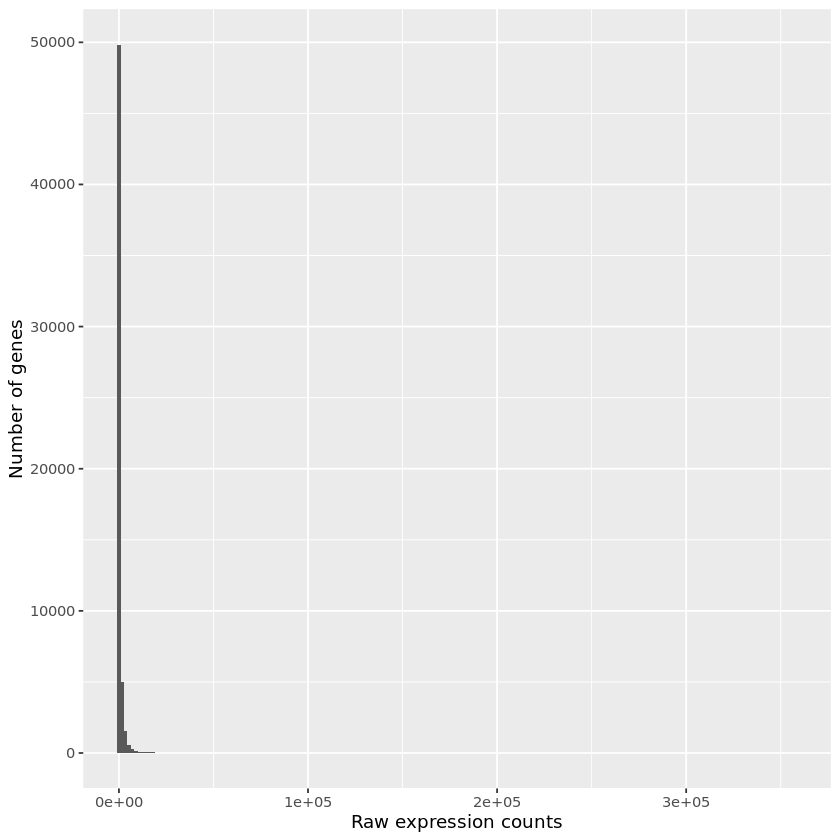

In [30]:
ggplot(data) +
    geom_histogram(aes(x = Mov10_oe_1), stat="bin", bins=200) +
    xlab("Raw expression counts") +
    ylab("Number of genes")

#### Modeling count data

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 6724 rows containing missing values (geom_point).”


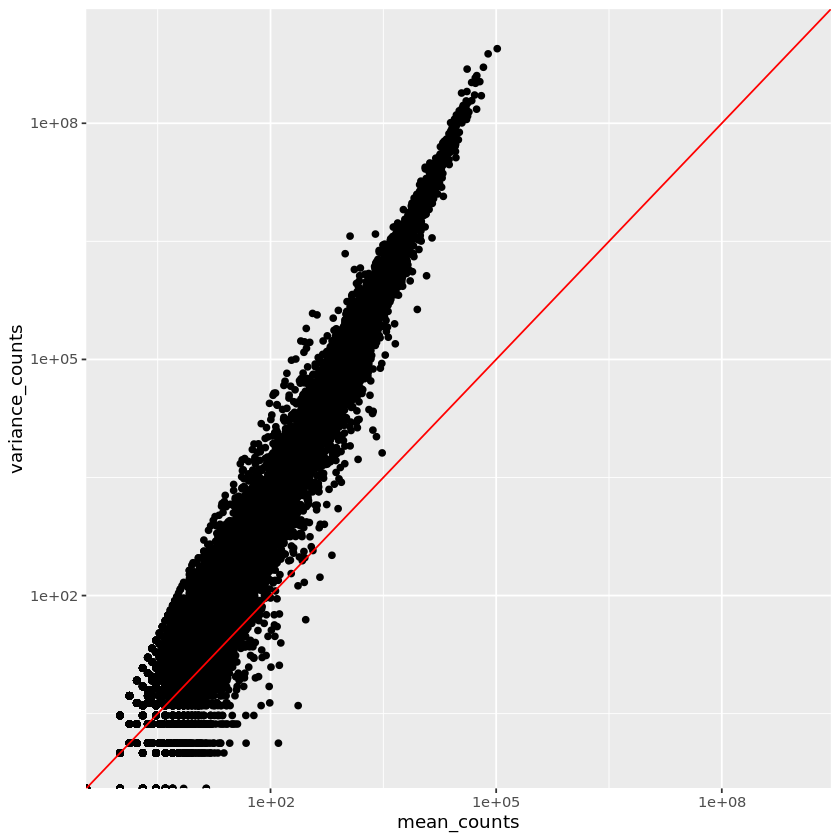

In [31]:
# The second argument '1' of 'apply' function indicates the function is being applied to rows.
# Use '2' if applied to columns 
mean_counts = apply(data[,6:8], 1, mean)
variance_counts = apply(data[,6:8], 1, var)
df = data.frame(mean_counts, variance_counts)

ggplot(df) +
        geom_point(aes(x=mean_counts, y=variance_counts)) + 
        scale_y_log10(limits = c(1,1e9)) +
        scale_x_log10(limits = c(1,1e9)) +
        geom_abline(intercept = 0, slope = 1, color="red")

In RNA-seq data, a large number of RNAs are represented, while the probability of pulling out a particular transcript is very small. This means Poisson and Negative Binomial distributions are well suited to model counts.

#### Improving mean estimates with biological replicates

**Increasing the number of biological replicates** is much more effective at returning more **differentially expressed genes** than increasing the sequecing depth.

#### Differential expression analysis workflow

Current best practice tools for differential gene expression analysis are:
1. DESeq2
2. EdgeR
3. LIMMA-Voom (for datasets with >20 biological replicates)

## 2. [Count normalization](https://hbctraining.github.io/DGE_workshop_salmon/lessons/02_DGE_count_normalization.html)

The main factors considered in normalization are:
1. sequencing depth
2. gene length
3. RNA composition (differences in the number of genes expressed between samples)

DESeq2 uses a **median of ratios** method which accounts for sequencing depth and RNA composition. Gene length is not a concern when performing differential gene expression, because we are comparing the _same gene_ between two groups (i.e. the counts in both samples are equally affected by length).

**Note**: DESeq2 doesn’t actually use normalized counts, rather it uses the raw counts and models the normalization inside the Generalized Linear Model (GLM). These normalized counts will be useful for downstream visualization of results, but cannot be used as input to DESeq2 or any other tools that peform differential expression analysis which use the negative binomial model.

### 2.1 Count normalization of Mov10 dataset using DESeq2

#### Match the metadata and counts data

In [34]:
all(colnames(txi$counts) == rownames(meta))

[1] TRUE

#### Create DESeq2 object

In [36]:
dds = DESeqDataSetFromTximport(txi, colData=meta, design=~sampletype)

using just counts from tximport



In [37]:
dds

class: DESeqDataSet 
dim: 57761 8 
metadata(1): version
assays(1): counts
rownames(57761): ENSG00000000003 ENSG00000000005 ... ENSG00000285978
  ENSG00000285980
rowData names(0):
colnames(8): Irrel_kd_1 Irrel_kd_2 ... Mov10_oe_2 Mov10_oe_3
colData names(1): sampletype

In [38]:
counts(dds)

,Irrel_kd_1,Irrel_kd_2,Irrel_kd_3,Mov10_kd_2,Mov10_kd_3,Mov10_oe_1,Mov10_oe_2,Mov10_oe_3
ENSG00000000003,4376,3645,2968,6178,3688,3343,3114,2079
ENSG00000000005,27,29,23,37,13,25,38,22
ENSG00000000419,1478,1288,884,2369,1340,1890,1766,1271
ENSG00000000457,508,405,357,934,571,646,591,354
ENSG00000000460,1394,1164,850,2172,1217,1183,1139,673
ENSG00000000938,1,1,0,2,0,0,0,0
ENSG00000000971,22,18,7,16,2,9,20,4
ENSG00000001036,3258,2599,1980,4600,2781,2938,3178,1664
ENSG00000001084,3001,2438,1967,4703,3021,2327,2415,1556
ENSG00000001167,3069,2415,1949,4609,2637,2634,2434,1371


#### Generate the Mov10 normalized counts

In [41]:
# generate the medians of ratios (the normalization factor)
dds = estimateSizeFactors(dds)

In [42]:
sizeFactors(dds)

Irrel_kd_1 Irrel_kd_2 Irrel_kd_3 Mov10_kd_2 Mov10_kd_3 Mov10_oe_1 Mov10_oe_2 
 1.1150371  0.9606366  0.7493552  1.5634128  0.9359082  1.2257749  1.1406863 
Mov10_oe_3 
 0.6541689

In [43]:
normalized_counts = counts(dds, normalized=TRUE)
write.table(
    normalized_counts,
    file=str_glue("{HOME}/scratch/dge/normalized_counts.txt"),
    sep="\t",
    quote=FALSE,
    col.names=NA
)

## 3. [QC methods for DESeq2 Count Data](https://hbctraining.github.io/DGE_workshop_salmon/lessons/03_DGE_QC_analysis.html)

### 3.1 Sample-level QC

Two QC methods: **PCA** and **hierarchical clustering**.

Hierarchical clustering is useful in DGE because biological replicates should have similar gene expression and thus cluster together.

### 3.2 Gene-level QC

Because DGE conducts a multiple hypothesis test, we can increase the power of the test by removing genes (therefore reducing the number of tests) that are unlikely to be detected as differentially expressed.

Genes are unlikely to be detected as differentially expressed if:
1. They have zero counts in all samples.
2. They have an extreme count outlier.
3. They have a low mean normalized count (averaged over samples).

### 3.3 Mov10 quality assessment and exploratory analysis using DESeq2

#### Transform normalized counts using the `rlog` transformation

`rlog` is only used to improve the distances in visualization methods. They are not used later on in the DGE analysis.

In [44]:
# rlog distance
# blind is used when performing quality assessments
rld = rlog(dds, blind=TRUE)

#### Principal components analysis (PCA)

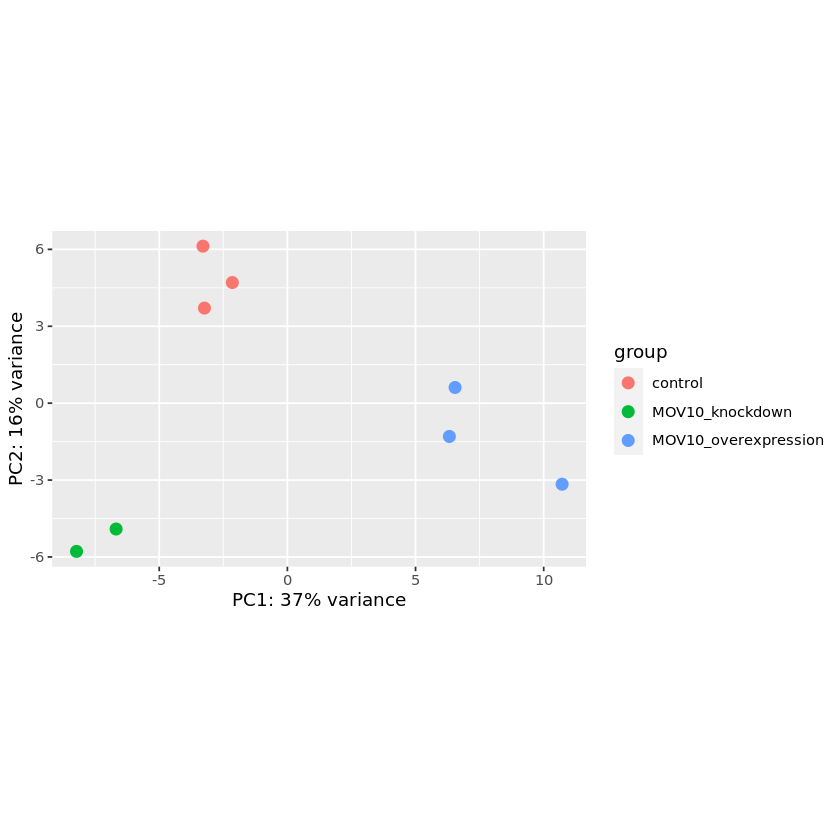

In [45]:
# intgroup = interest group
# plotPCA only works for PC1 and PC2
plotPCA(rld, intgroup="sampletype")

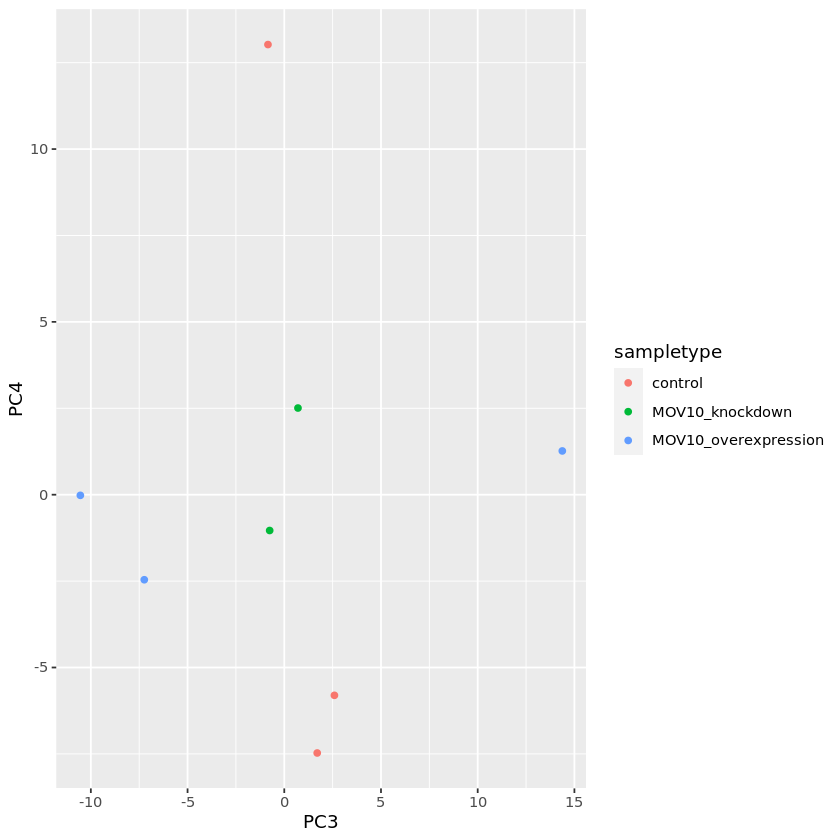

In [47]:
# PCA for PC3, PC4

# Input is a matrix of log transformed values
rld_mat = assay(rld)
pca = prcomp(t(rld_mat))

# Create data frame with metadata and PC3 and PC4 values for input to ggplot
df = cbind(meta, pca$x)
ggplot(df) + geom_point(aes(x=PC3, y=PC4, color = sampletype))

#### Hierarchical clustering

TODO: explain what an `assay` object is.

In [49]:
rld_matrix = assay(rld)
rld_cor = cor(rld_matrix)
head(rld_cor)

,Irrel_kd_1,Irrel_kd_2,Irrel_kd_3,Mov10_kd_2,Mov10_kd_3,Mov10_oe_1,Mov10_oe_2,Mov10_oe_3
Irrel_kd_1,1.0000000,0.9997740,0.9997525,0.9996005,0.9996334,0.9995372,0.9995326,0.9994112
Irrel_kd_2,0.9997740,1.0000000,0.9997564,0.9995701,0.9996137,0.9995441,0.9995407,0.9994279
Irrel_kd_3,0.9997525,0.9997564,1.0000000,0.9995460,0.9996014,0.9995541,0.9995620,0.9994254
Mov10_kd_2,0.9996005,0.9995701,0.9995460,1.0000000,0.9997927,0.9993895,0.9993608,0.9992364
Mov10_kd_3,0.9996334,0.9996137,0.9996014,0.9997927,1.0000000,0.9994757,0.9994457,0.9993479
Mov10_oe_1,0.9995372,0.9995441,0.9995541,0.9993895,0.9994757,1.0000000,0.9997794,0.9996902


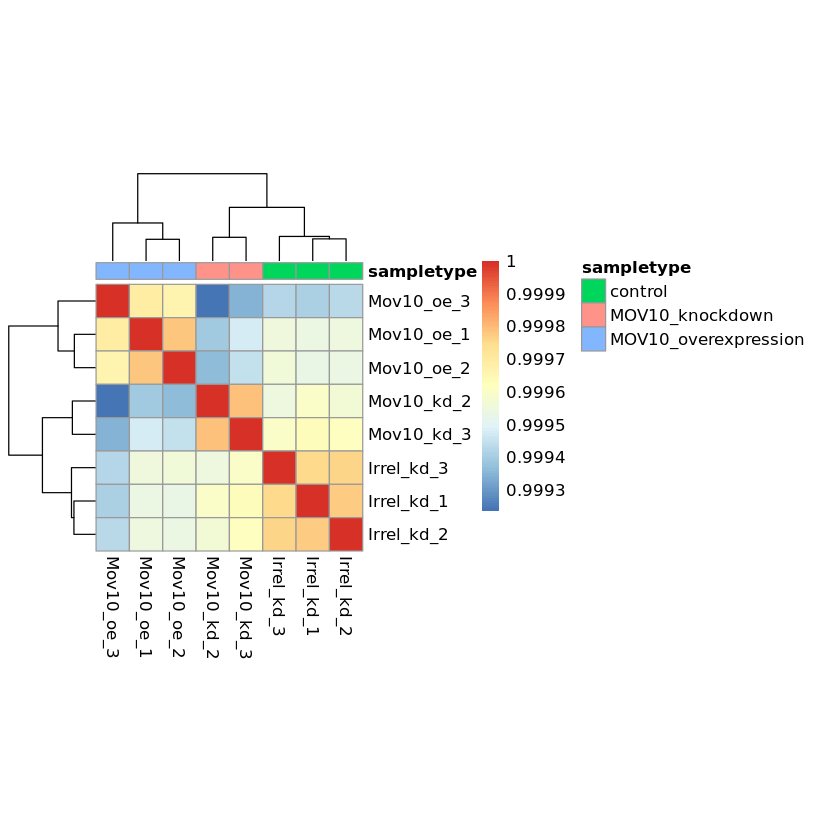

In [60]:
pheatmap(rld_cor, annotation=meta, cellheight=20, cellwidth=20, fontsize_row=10, height=20)

## 4. [Overview of DESeq2 Methods](https://hbctraining.github.io/DGE_workshop_salmon/lessons/04_DGE_DESeq2_analysis.html)

### 4.1 Differential expression analysis with DESeq2

The final step in the differential expression analysis workflow is **fitting the raw counts to the NB model** and **performing the statistical test** for differentially expressed genes.

DESeq2 performs multiple steps:
1. Model the raw counts and use normalization factors to account for differences in sequencing depth.
2. Estimate gene-wise dispersions and shrink these estimates to generate more accurate estimates of dispersion to model the cuonts.
3. Fit the negative binomial model.
4. Perform hypothesis testing using the Wald test or the Likelihood Ratio test.

### 4.2 Running DESeq2

#### Design formula

The design formula tells DESeq2 what the known sources of variation are, as well as the factor of interest, so that it can control for the known sources of variation.

### 4.3 Mov10 DE Analysis

In [61]:
dds = DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



#### Examining the size factors

In [64]:
print(colSums(counts(dds)))
print(colSums(counts(dds, normalized=TRUE)))

Irrel_kd_1 Irrel_kd_2 Irrel_kd_3 Mov10_kd_2 Mov10_kd_3 Mov10_oe_1 Mov10_oe_2 
  31160785   26504972   20498243   45300696   26745860   32062221   30025690 
Mov10_oe_3 
  17285401 
Irrel_kd_1 Irrel_kd_2 Irrel_kd_3 Mov10_kd_2 Mov10_kd_3 Mov10_oe_1 Mov10_oe_2 
  27945962   27591050   27354509   28975519   28577441   26156696   26322477 
Mov10_oe_3 
  26423452 


#### Estimate gene-wise dispersion

Dispersion is calculated as $\mathrm{Var} = \mu + \alpha \mu^2$, where $\alpha$ is dispersion. Equivalently, $\alpha = \frac{\mathrm{Var} - \mu}{\mu^2}$. If variance increases, so does dispersion. But when $\mu$ increases (the mean), dispersion decreases.

With only a few replicates per group, the _estimates of variation for each gene are often unreliable._ DESeq2 attempts to address this problem by sharing information across genes.

DESeq2 assumes that **genes with similar expression levels have similar dispersion**.

#### Fit curve to gene-wise dispersion estimates

#### Shrink gene-wise dispersion estimates toward the values predicted by the curve

The shrinkage method reduces false positives in DGE analysis. Under-dispersed genes are boosted towards the curve, and slightly over-dispersed genes are shrunk towards the curve. Extremely over-dispersed genes are left alone, as these may not follow the modeling assumptions.

Examining the dispersion plots here is a good way to ensure that your **data is a good fit for the DESeq2 model**.

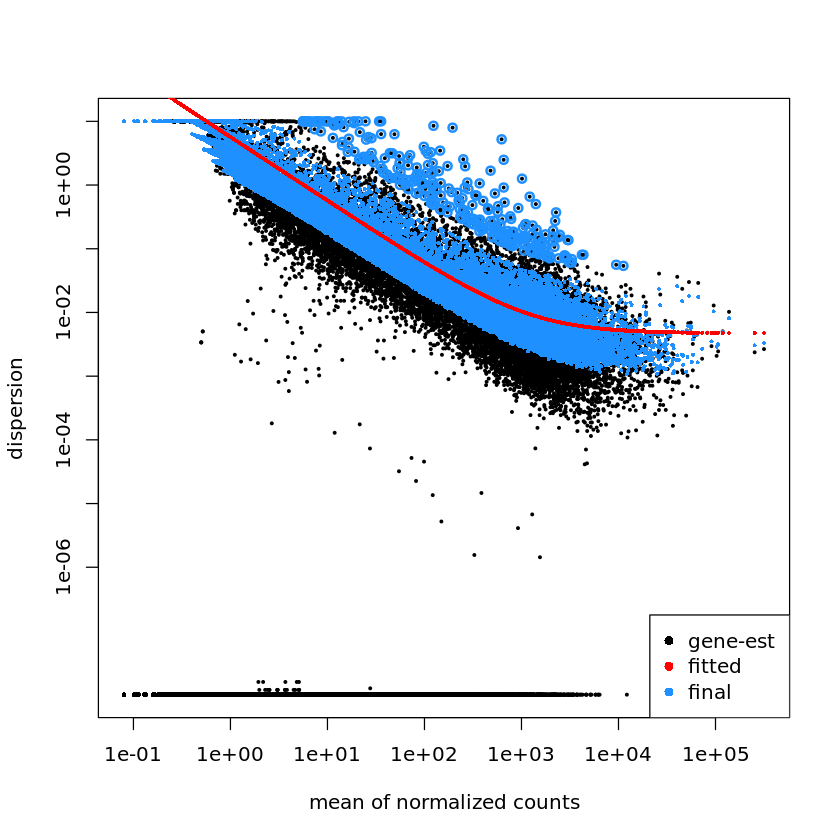

In [65]:
plotDispEsts(dds)

## 5. [DGE Analysis: Pairwise Comparisons (Wald Test)](https://hbctraining.github.io/DGE_workshop_salmon/lessons/05_DGE_DESeq2_analysis2.html)

### 5.1 Generalized linear model

$$
K_{ij} \sim \mathrm{NB}(s_{ij}q_{ij}, \alpha_i)
$$

$$
\log_2 q_{ij} = \sum_r x_{jr}\beta_{ir}
$$

### 5.2 Hypothesis testing

The coefficients of the model are the estimates of the **$\log_2$ fold changes (LFC)** for each sample group.

The null hypothesis is that **there is no differential expression across the two sample groups, i.e. the LFC is 0**.

### 5.3 Multiple test correction

### 5.4 Mov10 Differential expression analysis: control vs. overexpression

## 6. [DGE Analysis: Workflow Summarization](https://hbctraining.github.io/DGE_workshop_salmon/lessons/07_DGE_summarizing_workflow.html)

## 7. [DGE Analysis: Visualization](https://hbctraining.github.io/DGE_workshop_salmon/lessons/06_DGE_visualizing_results.html)

## 8. [DGE Analysis: Likelihood Ratio Test](https://hbctraining.github.io/DGE_workshop_salmon/lessons/08_DGE_LRT.html)

## 9. [Gene Annotations](https://hbctraining.github.io/DGE_workshop_salmon/lessons/genomic_annotation.html)

## 10. [Functional Analysis](https://hbctraining.github.io/DGE_workshop_salmon/lessons/functional_analysis_2019.html)